In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from operator import itemgetter
from numpy.random import default_rng

p = 10
f = 3
sf = 1
r = 5

# p = int(input("Number of demand points:"))
# f = int(input("Number of candidate sites:"))
# sf = int(input("Number of selected candidate sites:"))
# r = int(input("Radius to cover:"))

In [6]:
title = "p = " + str(p) + " f = " + str(f) + " sf = " + str(sf) + " r  =" + str(r)

def showInitialPlot(d_points, cs_points):
    fig = plt.figure(figsize=(10,10))
    plt.title(title)
    plt.suptitle('Random Generated Demand and Candidate Points')
    if p >= 100:
        ms = 1
    else:
        ms = 20
    plt.scatter([i[0] for i in d_points], [i[1] for i in d_points], c='black', s=ms)
    plt.scatter([i[0] for i in cs_points], [i[1] for i in cs_points], c='red', s=ms + 15)
    plt.savefig("firstg.jpg")
    plt.show()


def addCirclesToPlot(d_points, cs_points, selected_points, of):
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.title(title)
    plt.suptitle('Random Generated Demand and Candidate Points')
    if p >= 100:
        ms = 1
    else:
        ms = 20
    plt.scatter([i[0] for i in d_points], [i[1] for i in d_points], c='black', s=ms)
    plt.scatter([i[0] for i in cs_points], [i[1] for i in cs_points], c='red', s=ms + 15)
    for point in selected_points:
        circle = plt.Circle((point[0], point[1]), r, color='blue', fill=False)
        ax.add_patch(circle)
    plt.xlabel('Objective Function: ' + str(of))
    plt.savefig("secondg.jpg")
    plt.show()

In [7]:
# Generate Demand points
dx_points = default_rng().choice(p, size=(p - f), replace=False)
dy_points = default_rng().choice(p, size=(p - f), replace=False)

# Generate candidate sites
csx_points = default_rng().choice(p, size=(f), replace=False)
csy_points = default_rng().choice(p, size=(f), replace=False)

demand_points = []
candidate_sites = []

for x in range(p - f):
    demand_points.append([dx_points[x], dy_points[x]])

for x in range(f):
    candidate_sites.append([csx_points[x], csy_points[x]])

print(demand_points)
print(candidate_sites)

d_points_toPlot = list(demand_points)
c_points_toPlot = list(candidate_sites)

[[4, 8], [2, 3], [8, 6], [5, 1], [3, 0], [6, 4], [1, 9]]
[[5, 2], [0, 6], [9, 7]]


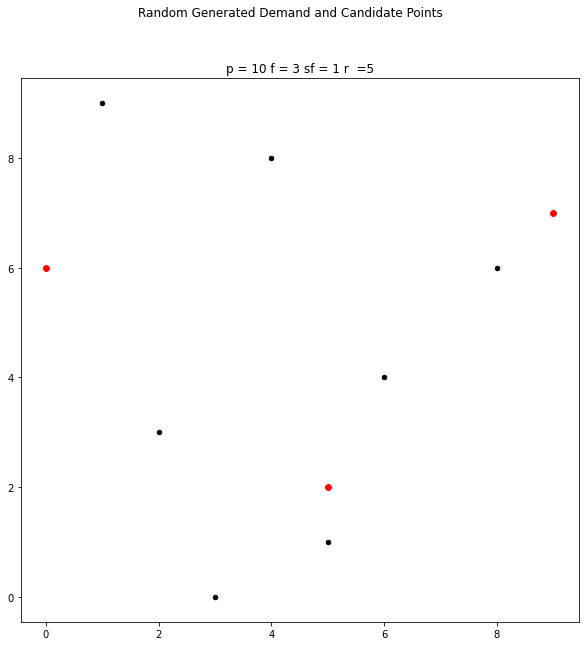

Distance between [5, 2] and [4, 8] is: 6.082762530298219
Distance between [5, 2] and [2, 3] is: 3.1622776601683795
Distance between [5, 2] and [8, 6] is: 5.0
Distance between [5, 2] and [5, 1] is: 1.0
Distance between [5, 2] and [3, 0] is: 2.8284271247461903
Distance between [5, 2] and [6, 4] is: 2.23606797749979
Distance between [5, 2] and [1, 9] is: 8.06225774829855
Distance between [0, 6] and [4, 8] is: 4.47213595499958
Distance between [0, 6] and [2, 3] is: 3.605551275463989
Distance between [0, 6] and [8, 6] is: 8.0
Distance between [0, 6] and [5, 1] is: 7.0710678118654755
Distance between [0, 6] and [3, 0] is: 6.708203932499369
Distance between [0, 6] and [6, 4] is: 6.324555320336759
Distance between [0, 6] and [1, 9] is: 3.1622776601683795
Distance between [9, 7] and [4, 8] is: 5.0990195135927845
Distance between [9, 7] and [2, 3] is: 8.06225774829855
Distance between [9, 7] and [8, 6] is: 1.4142135623730951
Distance between [9, 7] and [5, 1] is: 7.211102550927978
Distance betwe

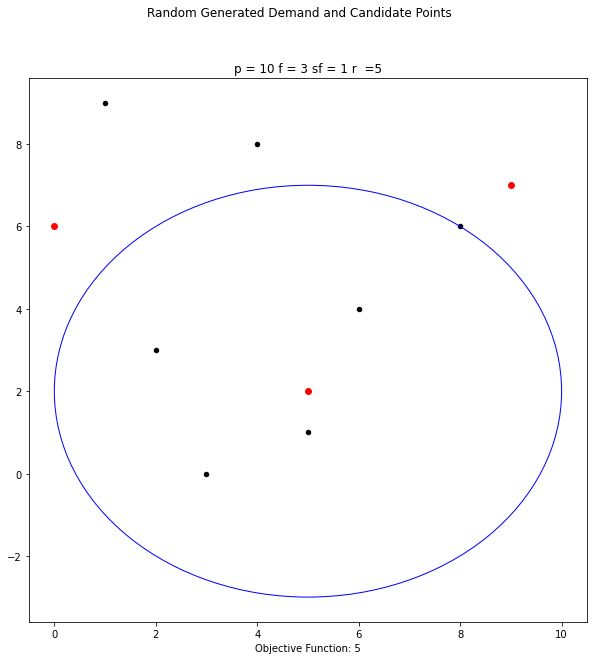

Covered points: [[2, 3], [8, 6], [5, 1], [3, 0], [6, 4]]


In [8]:
in_range = []
selected_toPlot = []

def get_Distances():
    for candidate in candidate_sites:
        for demand in demand_points:
            d = sqrt((demand[0] - candidate[0]) ** 2 + (candidate[1] - demand[1]) ** 2)
            print("Distance between", candidate, "and", demand, "is:", d)
            if d <= r:
                in_range.append([candidate, demand])

def count_covered():
    if len(in_range) == 0 or None:
        pass
    else:
        selected_candidate = []
        prev_max = 0
        for candidate in candidate_sites:
            count = [i[0] for i in in_range].count(candidate)
            if count > prev_max:
                prev_max = count
                selected_candidate.clear()
                selected_candidate.append(candidate)
        return selected_candidate

def remove_demand(candidate_tr):
    if len(candidate_tr) == 0 or None:
        pass
    else:
        to_remove = []
        for point in in_range:
            if point[0] == candidate_tr[0]:
                to_remove.append(point[1])
        for removing in to_remove:
            demand_points.remove(removing)
        candidate_sites.remove(candidate_tr[0])


showInitialPlot(d_points_toPlot, c_points_toPlot)
for x in range(sf):
    get_Distances()
    print("Points in range of candidate sites:", in_range)
    print("Candidate sites with more points covered:", count_covered())
    selected_toPlot.append(count_covered()[0])
    remove_demand(count_covered())
    print("New demand points:", demand_points)
    print("New candidate sites:", candidate_sites)
    in_range.clear()
    print("---------------------------------------------------------------")
addCirclesToPlot(d_points_toPlot, c_points_toPlot, selected_toPlot, (len(d_points_toPlot)-len(demand_points)))
covered_points = [item for item in d_points_toPlot if item not in demand_points]
print("Covered points:", covered_points)